<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/classification_challanges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Import Dataset

In [ ]:
fmnist_dataset = keras.datasets.fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fmnist_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print( X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

## Define Model with different initialization

In [ ]:
## model with He initialization
initializer_he = keras.initializers.HeNormal()

model_he_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer= initializer_he),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [ ]:
model_he_init.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weight, bias = model_he_init.layers[1].get_weights()
print(weight)
print(bias)

[[-0.09116976  0.07230942 -0.08892858 ...  0.06265605 -0.0124545
  -0.04278458]
 [ 0.05581209 -0.02479253  0.07217434 ... -0.04147955  0.00105083
   0.11377055]
 [ 0.01251297  0.00407392  0.03350857 ... -0.03162904  0.05397129
  -0.08092089]
 ...
 [ 0.02011095  0.02941548  0.10313978 ...  0.05499012  0.08612937
   0.00509225]
 [ 0.02741265 -0.04508071 -0.07573276 ...  0.02487154  0.02445038
   0.05060741]
 [-0.05185689  0.03198352  0.02833591 ...  0.0286429  -0.00760228
  -0.04661018]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
model_he_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
##fit model
history_he_init = model_he_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 8s 4ms/step - loss: 0.8639 - accuracy: 0.7150 - val_loss: 0.5888 - val_accuracy: 0.7959
Epoch 2/50
1594/1594 [==============================] - 7s 5ms/step - loss: 0.5303 - accuracy: 0.8165 - val_loss: 0.5199 - val_accuracy: 0.8186
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4754 - accuracy: 0.8335 - val_loss: 0.4889 - val_accuracy: 0.8288
Epoch 4/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4454 - accuracy: 0.8440 - val_loss: 0.4761 - val_accuracy: 0.8284
Epoch 5/50
1594/1594 [==============================] - 6s 3ms/step - loss: 0.4249 - accuracy: 0.8504 - val_loss: 0.4388 - val_accuracy: 0.8426
Epoch 6/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4089 - accuracy: 0.8548 - val_loss: 0.4314 - val_accuracy: 0.8427
Epoch 7/50
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3957 - accuracy: 0.8588 - val_loss: 0.4074 - val_accuracy:

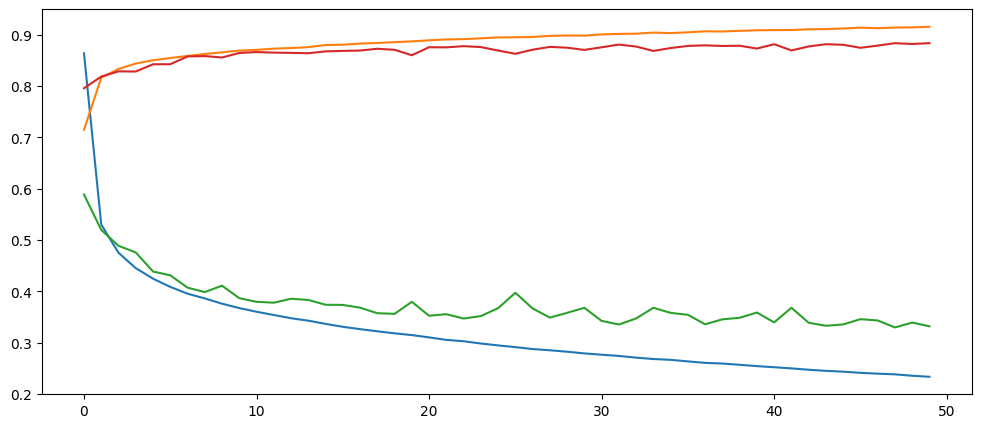

In [ ]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_he_init.history["loss"] , label="train loss")
ax.plot(history_he_init.history["accuracy"], label="train accuracy")
ax.plot(history_he_init.history["val_loss"], label="validation loss")
ax.plot(history_he_init.history["val_accuracy"], label="validation accuracy")

In [ ]:
## model with Lecunn initialization
initializer_lecun = keras.initializers.LecunNormal()

model_lecun_init = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="selu", kernel_initializer= initializer_lecun),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
]

)

In [ ]:
model_lecun_init.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weight_lecun, bias_lecun = model_lecun_init.layers[1].get_weights()
print(weight_lecun)
print(bias_lecun)

[[-0.01469436 -0.05814553  0.05762867 ... -0.00473742 -0.03104156
   0.01305955]
 [-0.04182997 -0.01276122  0.05632778 ...  0.01832412  0.00801955
   0.05259367]
 [ 0.05450604  0.00933961  0.02182312 ...  0.03831344 -0.00565718
   0.00995764]
 ...
 [-0.04045603 -0.03006285  0.03255638 ... -0.04031254 -0.0452831
   0.02451732]
 [-0.02307511  0.04108686  0.01046684 ...  0.04282362 -0.03966328
   0.02354187]
 [-0.02430068 -0.02888475 -0.01618332 ...  0.03223343  0.00782717
   0.07823705]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
model_lecun_init.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
##fit model
history_lecun = model_lecun_init.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.6299 - accuracy: 0.7899 - val_loss: 0.4921 - val_accuracy: 0.8234
Epoch 2/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4626 - accuracy: 0.8371 - val_loss: 0.4723 - val_accuracy: 0.8269
Epoch 3/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4310 - accuracy: 0.8474 - val_loss: 0.4240 - val_accuracy: 0.8473
Epoch 4/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4115 - accuracy: 0.8539 - val_loss: 0.4111 - val_accuracy: 0.8546
Epoch 5/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3997 - accuracy: 0.8585 - val_loss: 0.4005 - val_accuracy: 0.8559
Epoch 6/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3868 - accuracy: 0.8634 - val_loss: 0.3897 - val_accuracy: 0.8597
Epoch 7/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3782 - accuracy: 0.8649 - val_loss: 0.3957 - val_accuracy:

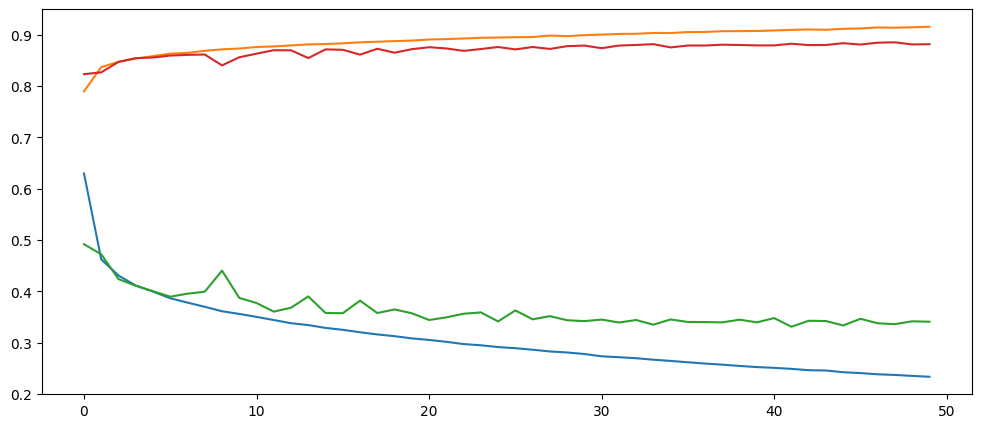

In [ ]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_lecun.history["loss"] , label="train loss")
ax.plot(history_lecun.history["accuracy"], label="train accuracy")
ax.plot(history_lecun.history["val_loss"], label="validation loss")
ax.plot(history_lecun.history["val_accuracy"], label="validation accuracy")

## Model with Batch Normalization

In [ ]:
## model with Batch Normalization
initializer_he = keras.initializers.HeNormal()

model_BNorm = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu", kernel_initializer= initializer_he),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax"),
    keras.layers.BatchNormalization()
]

)

In [ ]:
model_BNorm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 10)               

In [ ]:
model_BNorm.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
##fit model
history_BNorm = model_BNorm.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 7s 4ms/step - loss: 2.2917 - accuracy: 0.4527 - val_loss: 2.2044 - val_accuracy: 0.0711
Epoch 2/50
1594/1594 [==============================] - 6s 4ms/step - loss: 2.2498 - accuracy: 0.0953 - val_loss: 2.2093 - val_accuracy: 0.1097
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 2.2357 - accuracy: 0.1009 - val_loss: 2.2215 - val_accuracy: 0.1068
Epoch 4/50
1594/1594 [==============================] - 6s 4ms/step - loss: 2.2250 - accuracy: 0.0984 - val_loss: 2.2585 - val_accuracy: 0.1066
Epoch 5/50
1594/1594 [==============================] - 5s 3ms/step - loss: 2.2215 - accuracy: 0.0986 - val_loss: 2.2025 - val_accuracy: 0.1066
Epoch 6/50
1594/1594 [==============================] - 5s 3ms/step - loss: 2.2010 - accuracy: 0.0986 - val_loss: 2.1901 - val_accuracy: 0.1068
Epoch 7/50
1594/1594 [==============================] - 6s 4ms/step - loss: 2.1635 - accuracy: 0.1054 - val_loss: 2.3455 - val_accuracy:

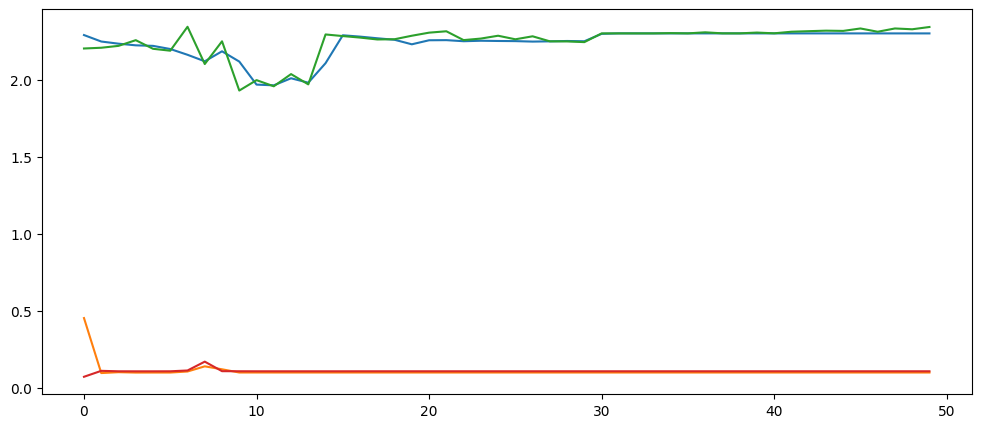

In [ ]:
##plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_BNorm.history["loss"] , label="train loss")
ax.plot(history_BNorm.history["accuracy"], label="train accuracy")
ax.plot(history_BNorm.history["val_loss"], label="validation loss")
ax.plot(history_BNorm.history["val_accuracy"], label="validation accuracy")